In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
# from lightgbm import LGBMClassifier 
from xgboost import XGBClassifier


ТУТ я взял данные и смотрю что мне они покажут 

In [39]:
# df1 = pd.read_csv("../AC/trein.csv")
# df2 = pd.read_csv("../AC/val.csv")
# df2.head(70)
df1 = pd.read_csv("train_edit.csv")
df2 = pd.read_csv("valid_edit.csv")

In [40]:
X_train = df1.drop('target', axis=1)
y_train = df1['target']
X_test = df2.drop('target', axis=1)
y_test = df2['target']

In [41]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    print(f"\n{model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC/Кривая) (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

С неплохи результатом


In [ ]:
# log_reg = LogisticRegression(random_state=42, max_iter=100000)
# log_reg.fit(X_train, y_train)
# evaluate_model(log_reg, X_test, y_test, "Logistic Regression")


Random Forest
Accuracy: 0.9816
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3576
           1       0.33      0.02      0.03        66

    accuracy                           0.98      3642
   macro avg       0.66      0.51      0.51      3642
weighted avg       0.97      0.98      0.97      3642



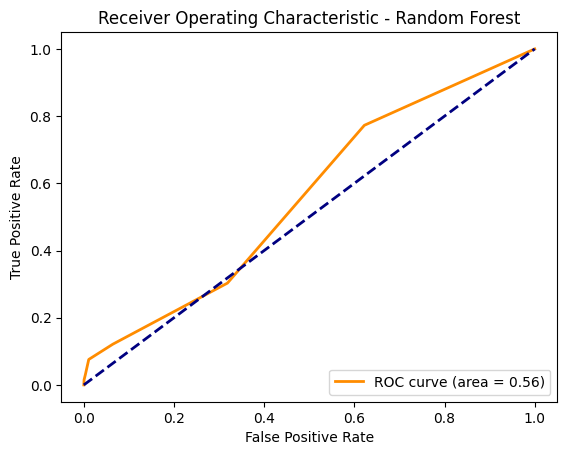

In [ ]:
random_forest = RandomForestClassifier(random_state=42, n_estimators=10)
random_forest.fit(X_train, y_train)
evaluate_model(random_forest, X_test, y_test, "Random Forest")

In [28]:
# lgbm = LGBMClassifier(random_state=1)
# lgbm.fit(X_train, y_train)
# evaluate_model(lgbm, X_test, y_test, "LightGBM")

c:\Users\Darin_btw\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:17:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost
Accuracy: 0.9819
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3576
           1       0.50      0.03      0.06        66

    accuracy                           0.98      3642
   macro avg       0.74      0.51      0.52      3642
weighted avg       0.97      0.98      0.97      3642



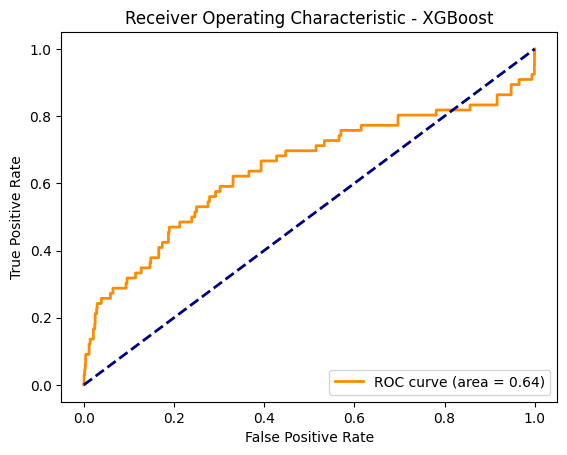

In [29]:
xgboost = XGBClassifier(random_state=50, use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train, y_train)
evaluate_model(xgboost, X_test, y_test, "XGBoost") # ну норм



С результатом похуже


Decision Tree
Accuracy: 0.8946
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      3576
           1       0.04      0.20      0.06        66

    accuracy                           0.89      3642
   macro avg       0.51      0.55      0.50      3642
weighted avg       0.97      0.89      0.93      3642



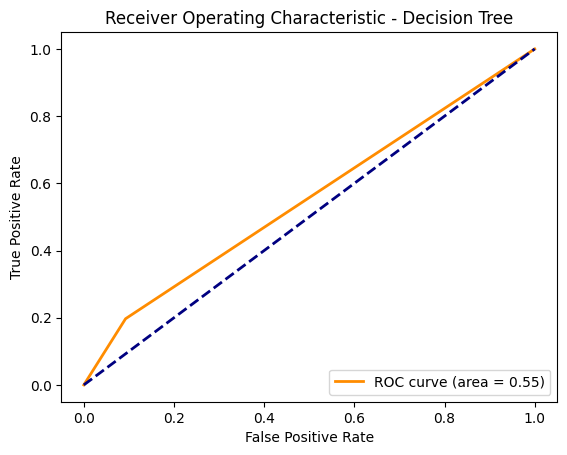

In [30]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
evaluate_model(decision_tree, X_test, y_test, "Decision Tree")# както грустно


Neural Network (MLPClassifier)
Accuracy: 0.9797
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3576
           1       0.00      0.00      0.00        66

    accuracy                           0.98      3642
   macro avg       0.49      0.50      0.49      3642
weighted avg       0.96      0.98      0.97      3642



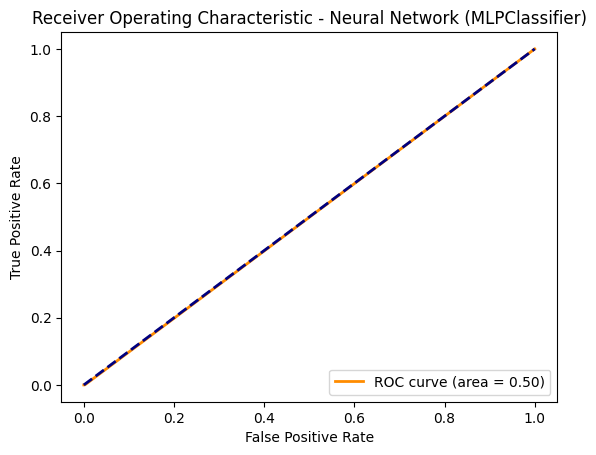

In [31]:
mlp = MLPClassifier(random_state=10000, max_iter=100)
mlp.fit(X_train, y_train)
evaluate_model(mlp, X_test, y_test, "Neural Network (MLPClassifier)") # ну тут в + непалучилось больше 55 никак

пытаемся настроить модельку и протестить 


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from xgboost import XGBClassifier
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Оценка RandomForest
evaluate_model(best_rf_model, X_test, y_test, "XGBoost")

ModuleNotFoundError: No module named 'lightgbm'

In [81]:
X_train = df1.drop(columns=["target"])
y_train = df1["target"]

X_val = df2.drop(columns=["target"])
y_val = df2["target"]

In [82]:
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")
print("Classification Report on Validation Data:")
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.98
Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3576
           1       0.00      0.00      0.00        66

    accuracy                           0.98      3642
   macro avg       0.49      0.50      0.50      3642
weighted avg       0.96      0.98      0.97      3642



c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

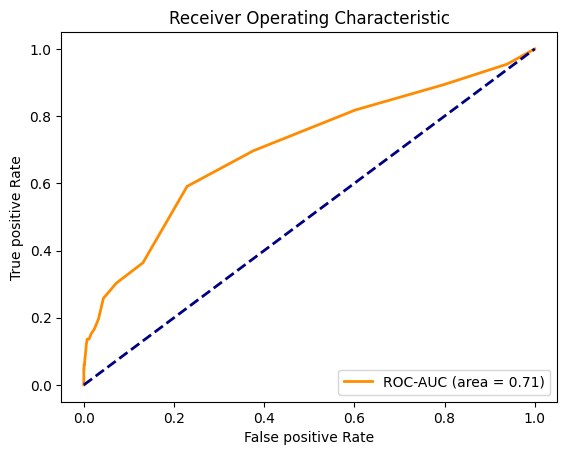

In [83]:
y_prob = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-AUC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()